<a href="https://colab.research.google.com/github/ImperatorAvrelianvs/Generalized_Pell_equation_solver/blob/main/Pell_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data loaded, cleaned, and validated successfully.

--- Descriptive Statistics ---

Statistics for unique (D, N) pairs:
                 D            N  num_classes
count  9347.000000  9347.000000  9347.000000
mean    102.785386    -0.317856     0.346956
std      56.942248   116.025621     0.999883
min       2.000000  -200.000000     0.000000
25%      54.000000  -100.000000     0.000000
50%     104.000000    -1.000000     0.000000
75%     152.000000   101.000000     0.000000
max     200.000000   200.000000    12.000000

Statistics for all generated solutions (x, y):
          log_x_abs     log_y_abs
count  42785.000000  42785.000000
mean      48.866850     47.174153
std       62.798365     62.318565
min        0.000000      0.000000
25%        4.976734      3.135494
50%       28.043231     26.015940
75%       65.378754     63.154740
max      432.229294    429.630045

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42785 entries, 0 to 42784
Data columns (total 5 colum

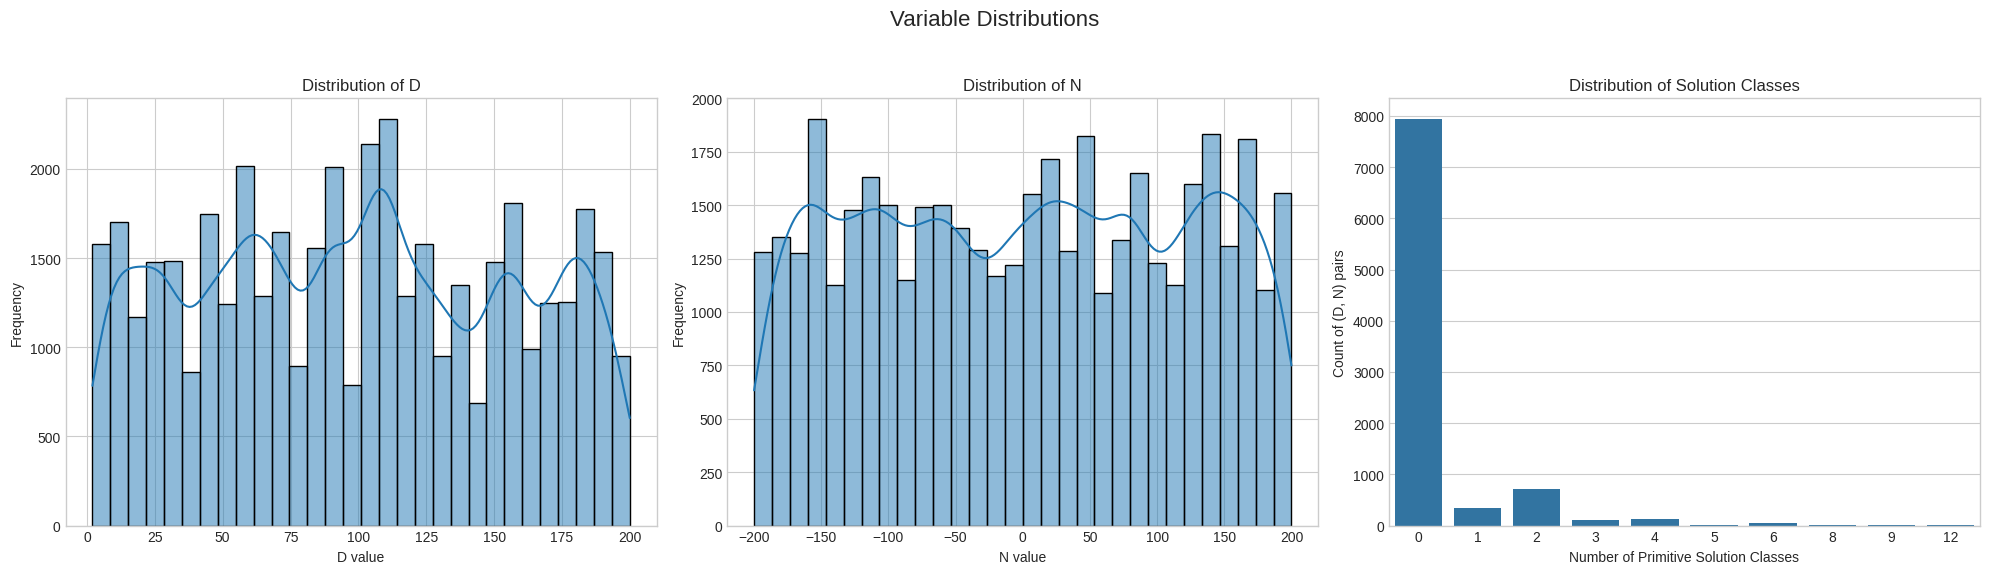


📉 Generating relationship and solution plots...


/tmp/ipython-input-4-3297763287.py:153: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = unique_pairs.pivot_table(


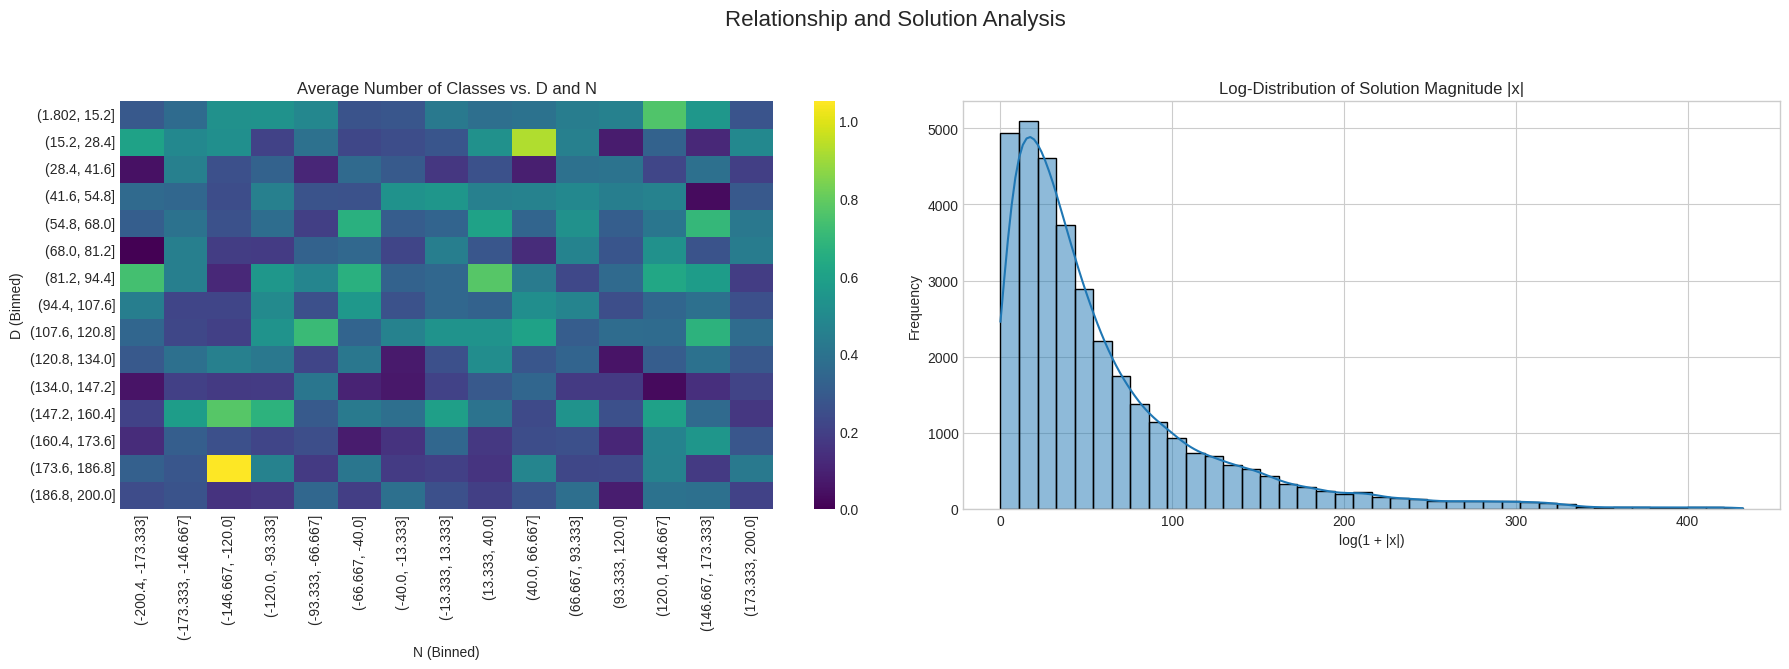


🎉 Statistical analysis complete.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# --- 1) Data Loading and Validation (Corrected) ---
def load_and_validate_data(filepath: str):
    """
    Loads the dataset, converts columns to numeric types, and performs validation.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The validated and cleaned DataFrame, or None if validation fails.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return None

    # Verify that the essential columns are present
    required_columns = ['D', 'N', 'num_classes', 'x', 'y']
    if not all(col in df.columns for col in required_columns):
        print(f"Error: The CSV is missing one or more required columns: {required_columns}")
        return None

    # --- FIX ---
    # Convert columns to numeric, coercing errors to NaN (Not a Number)
    for col in required_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows where key numeric values could not be parsed
    df.dropna(subset=required_columns, inplace=True)

    # Cast to integer types where appropriate
    for col in ['D', 'N', 'num_classes']:
        df[col] = df[col].astype(int)

    print("✅ Data loaded, cleaned, and validated successfully.")
    return df

# --- 2) Descriptive Statistics ---
def print_descriptive_stats(df: pd.DataFrame):
    """
    Prints descriptive statistics and general info about the DataFrame.
    """
    print("\n--- Descriptive Statistics ---")
    # We need to analyze the unique (D, N) pairs for stats on num_classes
    unique_pairs = df[['D', 'N', 'num_classes']].drop_duplicates()
    print("\nStatistics for unique (D, N) pairs:")
    print(unique_pairs.describe())

    print("\nStatistics for all generated solutions (x, y):")
    # Use log to handle the wide range of solution values, adding 1 to avoid log(0)
    df_log_sol = pd.DataFrame()
    df_log_sol['log_x_abs'] = np.log1p(np.abs(df['x']))
    df_log_sol['log_y_abs'] = np.log1p(np.abs(df['y']))
    print(df_log_sol.describe())

    print("\nDataFrame Info:")
    df.info()
    print("-" * 30)

# --- 3) Distribution Analysis ---
def plot_distributions(df: pd.DataFrame):
    """
    Plots the distributions of D, N, and the number of solution classes.
    """
    print("\n📊 Generating distribution plots...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Variable Distributions', fontsize=16)

    # Distribution of D
    sns.histplot(df['D'], kde=True, ax=axes[0], bins=30)
    axes[0].set_title('Distribution of D')
    axes[0].set_xlabel('D value')
    axes[0].set_ylabel('Frequency')

    # Distribution of N
    sns.histplot(df['N'], kde=True, ax=axes[1], bins=30)
    axes[1].set_title('Distribution of N')
    axes[1].set_xlabel('N value')
    axes[1].set_ylabel('Frequency')

    # Distribution of Number of Solution Classes
    unique_pairs = df[['D', 'N', 'num_classes']].drop_duplicates()
    sns.countplot(x='num_classes', data=unique_pairs, ax=axes[2])
    axes[2].set_title('Distribution of Solution Classes')
    axes[2].set_xlabel('Number of Primitive Solution Classes')
    axes[2].set_ylabel('Count of (D, N) pairs')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- 4) Solvability Analysis ---
def analyze_solvability(df: pd.DataFrame):
    """
    Analyzes the solvability of the equations (where num_classes > 0).
    """
    print("\n--- Solvability Analysis ---")
    unique_pairs = df[['D', 'N', 'num_classes']].drop_duplicates()
    total_pairs = len(unique_pairs)

    # Identify solvable cases (at least one solution class)
    solvable_df = unique_pairs[unique_pairs['num_classes'] > 0]
    num_solvable = len(solvable_df)
    solvability_rate = (num_solvable / total_pairs) * 100 if total_pairs > 0 else 0

    print(f"Total unique (D, N) pairs sampled: {total_pairs}")
    print(f"Number of solvable (D, N) pairs: {num_solvable}")
    print(f"Overall Solvability Rate: {solvability_rate:.2f}%")

    # Chi-squared test: Is solvability independent of the sign of N?
    unique_pairs['is_solvable'] = unique_pairs['num_classes'] > 0
    unique_pairs['N_sign'] = np.sign(unique_pairs['N'])

    contingency_table = pd.crosstab(unique_pairs['is_solvable'], unique_pairs['N_sign'])

    print("\nContingency Table (Solvability vs. N sign):")
    print(contingency_table)

    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi-Squared Test for Solvability vs. N sign:")
    print(f"Chi2 statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")

    alpha = 0.05
    if p < alpha:
        print(f"Conclusion: We reject the null hypothesis (p < {alpha}).")
        print("There is a statistically significant association between the sign of N and whether the equation x^2 - Dy^2 = N has solutions.")
    else:
        print(f"Conclusion: We fail to reject the null hypothesis (p >= {alpha}).")
        print("There is no statistically significant association between the sign of N and solvability.")
    print("-" * 30)

# --- 5) Relationship and Solution Analysis ---
def plot_relationships(df: pd.DataFrame):
    """
    Visualizes relationships between variables and the distribution of solutions.
    """
    print("\n📉 Generating relationship and solution plots...")
    unique_pairs = df[['D', 'N', 'num_classes']].drop_duplicates()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle('Relationship and Solution Analysis', fontsize=16)

    # Heatmap of num_classes vs. D and N
    try:
        heatmap_data = unique_pairs.pivot_table(
            index=pd.cut(unique_pairs['D'], bins=15),
            columns=pd.cut(unique_pairs['N'], bins=15),
            values='num_classes',
            aggfunc='mean'
        )
        sns.heatmap(heatmap_data, ax=axes[0], cmap='viridis')
        axes[0].set_title('Average Number of Classes vs. D and N')
        axes[0].set_xlabel('N (Binned)')
        axes[0].set_ylabel('D (Binned)')
    except ValueError as e:
        axes[0].text(0.5, 0.5, 'Could not generate heatmap.\nNot enough data variation for binning.',
                     ha='center', va='center', style='italic')
        print(f"Warning: Could not create heatmap - {e}")

    # Distribution of the magnitude of solutions |x|
    solutions_only_df = df[df['num_classes'] > 0].copy()
    solutions_only_df['log_x_abs'] = np.log1p(np.abs(solutions_only_df['x']))

    sns.histplot(data=solutions_only_df, x='log_x_abs', ax=axes[1], bins=40, kde=True)
    axes[1].set_title('Log-Distribution of Solution Magnitude |x|')
    axes[1].set_xlabel('log(1 + |x|)')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Main Execution ---
if __name__ == '__main__':
    # 🚨 IMPORTANT: Replace this with the actual path to your CSV file.
    CSV_FILE_PATH = 'pell_dataset.csv'

    # Run the analysis
    pell_df = load_and_validate_data(CSV_FILE_PATH)

    if pell_df is not None:
        print_descriptive_stats(pell_df)
        analyze_solvability(pell_df)
        plot_distributions(pell_df)
        plot_relationships(pell_df)
        print("\n🎉 Statistical analysis complete.")